In [68]:
import random
n=50
V = [(random.uniform(5,75),random.uniform(5,55)) for i in range(n)]
import matplotlib.pyplot as plt
alpha=0.5

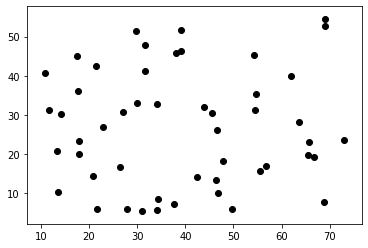

In [69]:
import matplotlib.pyplot as plt
for i in range(len(V)):
    plt.scatter(V[i][0],V[i][1],c='k')
plt.show()

In [70]:
def t_cost(s,t): return ((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5)
def d_cost(s,t): return alpha*(((s[0]-t[0])**2+(s[1]-t[1])**2)**(0.5))

In [71]:
#最小全域木を求める（プリムのアルゴリズム）
def Prim(V,E):
    mst=[]
    visited=set()
    for i in E:
        if E[i]==min(E.values()):
            mst.append(i)
            visited.add(i[0])
            visited.add(i[1])
            del E[i]
            break
            
    while len(visited)<len(V):
        tsuikakouho={}
        for i in E:
            if (i[0] in visited or i[1] in visited) and not (i[0] in visited and i[1] in visited):
                tsuikakouho[i]=E[i]
        for i in tsuikakouho:
            if tsuikakouho[i]==min(tsuikakouho.values()):
                mst.append(i)
                visited.add(i[0])
                visited.add(i[1])
                del E[i]
                break
            
            
            
            
    return mst
        
    
    

In [72]:
def tspheuristic(V,E,start):
    route=[]
    visited=set()
    eda={}
    for i in E: eda[i]=E[i]
    p=Prim(V,eda)
    route.append(start)
    visited.add(start)
    while len(route)<len(V):
        nextedge=set()
        for i in range(len(p)):
            if (route[-1]==p[i][0]) and not(p[i][1] in visited):
                nextedge.add(p[i])
            elif (route[-1]==p[i][1]) and not(p[i][0] in visited):
                nextedge.add(p[i])
        if len(nextedge)==0:
            for i in E:
                if (route[-1]==i[0]) and not (i[1] in visited):
                    nextedge.add(i)
                elif (route[-1]==i[1]) and not (i[0] in visited):
                    nextedge.add(i)
        for i in nextedge:
            if E[i]==min([E[i] for i in nextedge]):
                if route[-1]==i[0]:
                    route.append(i[1])
                    visited.add(i[1])
                elif route[-1]==i[1]:
                    route.append(i[0])
                    visited.add(i[0])
                    
    for i in range(len(V)):
        plt.scatter(V[start][0],V[start][1],c='red')
        plt.scatter(V[i][0],V[i][1],c='k')
        connect_x=[V[route[i]][0],V[route[(i+1)%len(V)]][0]]
        connect_y=[V[route[i]][1],V[route[(i+1)%len(V)]][1]]
        plt.plot(connect_x,connect_y, c='red')
            

    
    return route

    
    
        

[0,
 9,
 38,
 17,
 26,
 27,
 5,
 18,
 4,
 21,
 37,
 22,
 29,
 16,
 36,
 2,
 41,
 48,
 25,
 28,
 30,
 44,
 23,
 31,
 42,
 34,
 20,
 19,
 10,
 39,
 6,
 32,
 13,
 46,
 1,
 3,
 40,
 43,
 47,
 11,
 12,
 49,
 8,
 24,
 7,
 45,
 15,
 14,
 33,
 35]

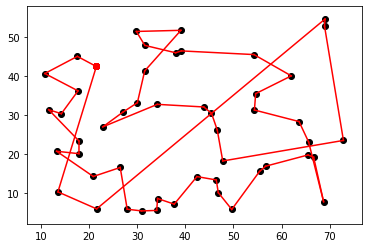

In [73]:
import itertools
edges=[i for i in itertools.combinations(range(len(V)),2)]
edgecost=[t_cost(V[edges[i][0]],V[edges[i][1]]) for i in range(len(edges))]
E={}
for i in range(len(edges)):
    E[(edges[i])]=edgecost[i]
# Prim(V,E)
tspheuristic(V,E,0)


In [139]:
Prim(V,E)

[(0, 3), (0, 1), (1, 4), (1, 2)]

In [196]:
v={1,2,3,4,5}

In [202]:
not(8 in v) and len(v)==5

True